## ECON 8185 - Homework Assignment 2

#### Xiang Liu
#### Email: liu01246@umn.edu
#### ID: 5596987
#### I gained help from Yutong.

In [1]:
from collections import namedtuple
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt
from scipy.stats import stats, beta
import math
import timeit


In [2]:
# Try to use named tuples in this assignment
# Define a namedtuple for grid settings

GridSettings = namedtuple('GridSettings', ['gridsize', 'gmin', 'gmax'])

grid_settings = GridSettings(gridsize = 100, gmin = 1e-5, gmax = 1 - 1e-5) # avoid division by zero

In [3]:
# Create the xgrid array based on grid settings

@njit
def create_xgrid(grid_settings):
    return np.linspace(grid_settings.gmin, grid_settings.gmax, grid_settings.gridsize)

In [4]:
# Define the g(x) function using numba's njit decorator

@njit
def g(x):
    return 4 * x * (1 - x)

In [5]:
# Define a function to compute the graph of g(x)

@njit
def Graph(grid_settings):
    xgrid = create_xgrid(grid_settings)
    G = np.empty(xgrid.shape[0])

    for i in range(xgrid.shape[0]):
        G[i] = g(xgrid[i])
    return xgrid, G

In [6]:
# Define a function to plot Graph(grid_settings) together with a 45-degree line

def plot_graph_with_45_degree_line(grid_settings):
    xgrid, G = Graph(grid_settings)

    # Create a 45-degree line
    x = np.linspace(grid_settings.gmin, grid_settings.gmax, grid_settings.gridsize)
    y = x

    # Plot the data
    fig, ax = plt.subplots()
    ax.plot(xgrid, G, label = 'g(x) = 4x(1-x)')
    ax.plot(x, y, color = 'black', linewidth = 0.5, label = '45 degree line')
    ax.legend(loc = 'lower center')
    plt.title('Figure: The quadratic map and 45 degree line')
    plt.show()

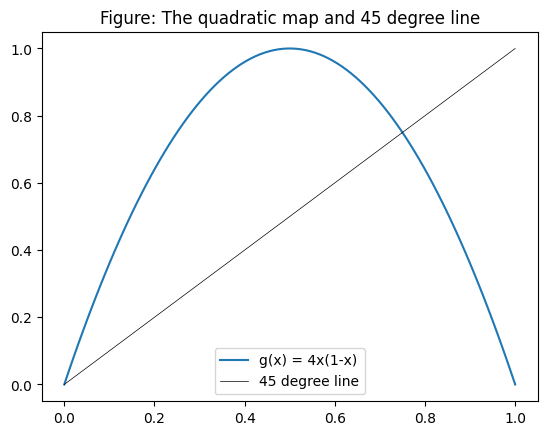

In [7]:
# Plot:

plot_graph_with_45_degree_line(grid_settings)

In [8]:
# Define the ConfigSettings named tuple for setting up initial value for x and T

ConfigSettings = namedtuple('ConfigSettings', ['initial_x', 'T'])

In [9]:
# Define the time_series function

@njit
def time_series(config):
    x_t = np.empty(config.T)
    x_t[0] = config.initial_x

    for t in range(config.T-1):
        x_t[t+1] = g(x_t[t])
    return x_t

In [10]:
# Define a function to plot the time series

def plot_time_series(config):
    X_T = time_series(config)

    plt.figure(figsize = (8, 6))
    plt.plot(X_T, "-o")
    plt.xlabel('$t$', fontsize = 12)
    plt.ylabel('$x_{t}$', fontsize = 12)
    plt.title(f'Figure: Time series from the quadratic map when $x_0$ = {config.initial_x}')
    plt.grid(False)
    plt.show()

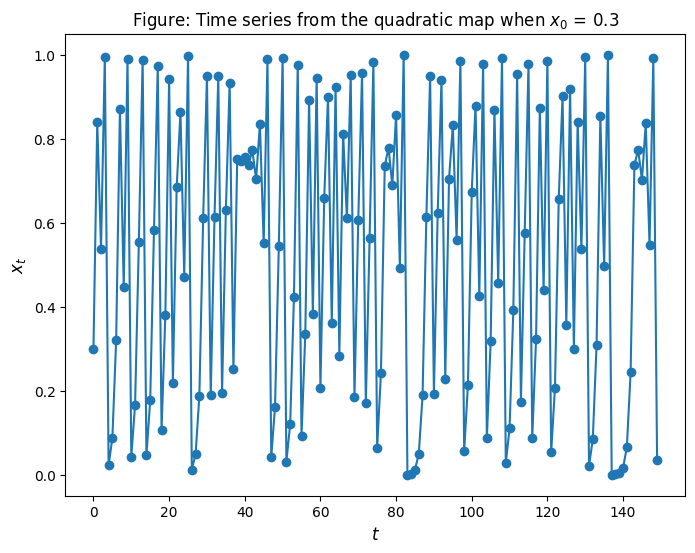

In [11]:
# Plot

config = ConfigSettings(initial_x = 0.3, T = 150)
plot_time_series(config)


In [12]:
# Define a function to calculate g^t(x_0) for a range of initial conditions using named tuple ConfigSettings

@njit
def ComGraph(config, grid_settings):
    xgrid = create_xgrid(grid_settings)  # Get xgrid from grid_settings
    gt = np.empty(xgrid.shape[0])

    for i in range(xgrid.shape[0]):
        config_i = ConfigSettings(initial_x = xgrid[i], T = config.T)
        x_t = time_series(config_i)
        gt[i] = x_t[config.T - 1]
    return xgrid, gt

In [13]:
# Define a function to plot the results

def plot_forecast_state(config, grid_settings):
    xgrid, Gt = ComGraph(config, grid_settings)  # Get xgrid and Gt from ComGraph

    plt.figure(figsize = (8, 6))
    plt.plot(xgrid, Gt)
    plt.xlabel('Initial condition $x_{0}$', fontsize = 12)
    plt.ylabel('$g^{t}(x_{0})$', fontsize = 12)
    plt.title('Figure: The time t state as a function of the initial condition')
    plt.grid(False)
    plt.show()

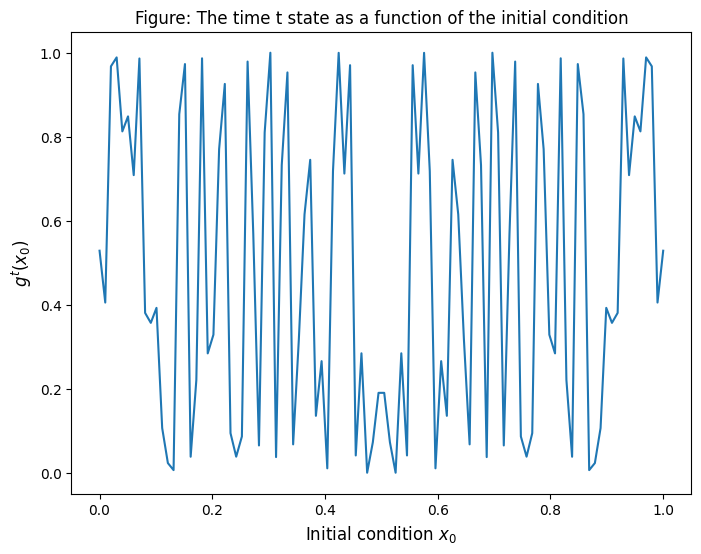

In [14]:
# Plot:

config_settings = ConfigSettings(initial_x = None, T = 20)
plot_forecast_state(config_settings, grid_settings)

In [15]:
# Define the plot function to create a histogram

def plot_histogram(config):
    x_0 = config.initial_x
    T = config.T

    x_t = time_series(config)

    plt.figure(figsize = (8, 6))
    plt.hist(x_t, bins = 100, density = True, label = 'observation')
    plt.ylim(bottom = 0, top = 6)
    plt.legend(loc = 'upper center')
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of the sequence $(g^t(x_0))_{{n=0}}^t$ for $x_0 = {x_0}$ and $T = {T}$')
    plt.show()


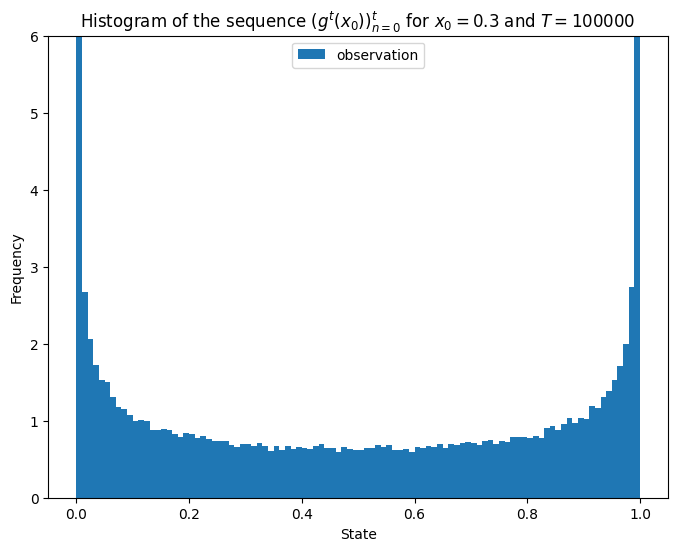

In [16]:
# Plot:

config_settings = ConfigSettings(initial_x = 0.3, T = 100000)
plot_histogram(config_settings)

In [17]:
# Define a function that calculates the density of the psi_star function:
#       psi_star(x) = 1 / (math.pi * math.sqrt(x * (1 - x)))
# for a given range of values x using Numba.


@njit
def psi_density(x):
    psi = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        psi[i] = 1 / (math.pi * math.sqrt(x[i] * (1 - x[i])))
    return psi



In [18]:
# Define a function to plot histogram and arcsine distribution together

def plot_histogram_and_arcsine(config, grid_settings):
    xgrid, Gt = ComGraph(config, grid_settings)  # Get xgrid and Gt from ComGraph
    psi = psi_density(xgrid)  # Calculate arcsine distribution density

    plt.figure(figsize = (8, 6))

    # Plot histogram
    plt.hist(time_series(config), bins = 100, density = True, label = 'observation', alpha = 0.7)

    # Plot arcsine distribution density
    plt.plot(xgrid, psi, label = '$\psi^*$')

    plt.ylim(bottom = 0, top = 6)
    plt.legend(loc = 'upper center')
    plt.xlabel('State')
    plt.ylabel('Frequency / Density')
    plt.title(f'Histogram and $\psi^*$ Density for $x_0 = {config.initial_x}$ and $T = {config.T}$')
    plt.grid(False)
    plt.show()




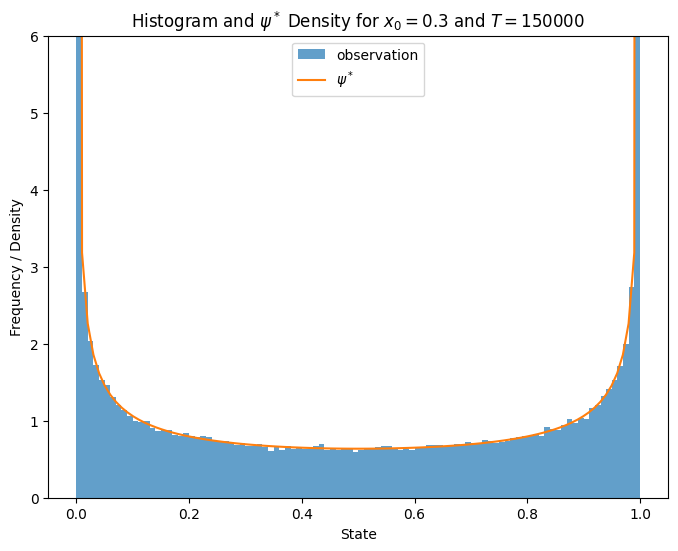

In [19]:
# Plot both histogram and arcsine distribution density function:

config_settings = ConfigSettings(initial_x = 0.3, T = 150000)
plot_histogram_and_arcsine(config_settings, grid_settings)

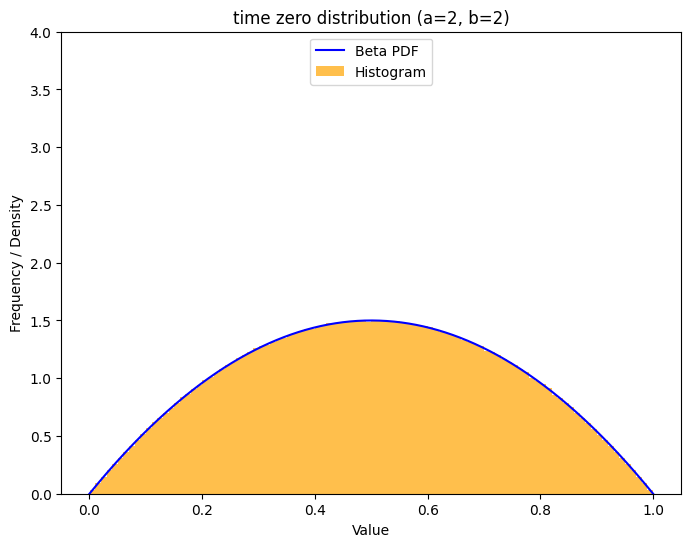

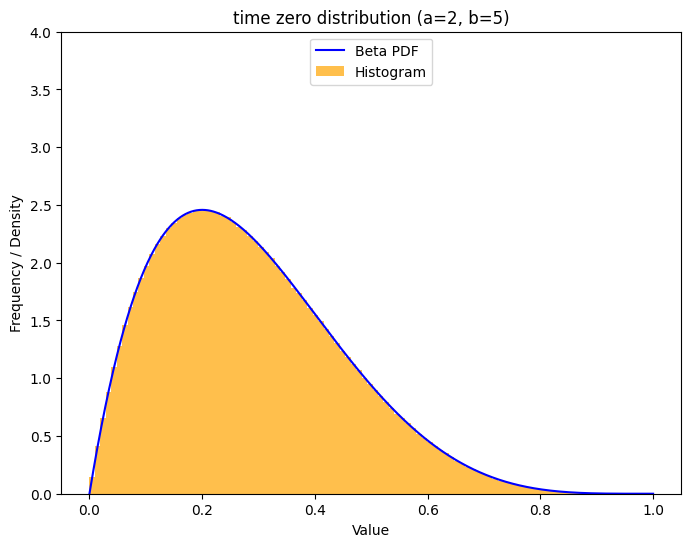

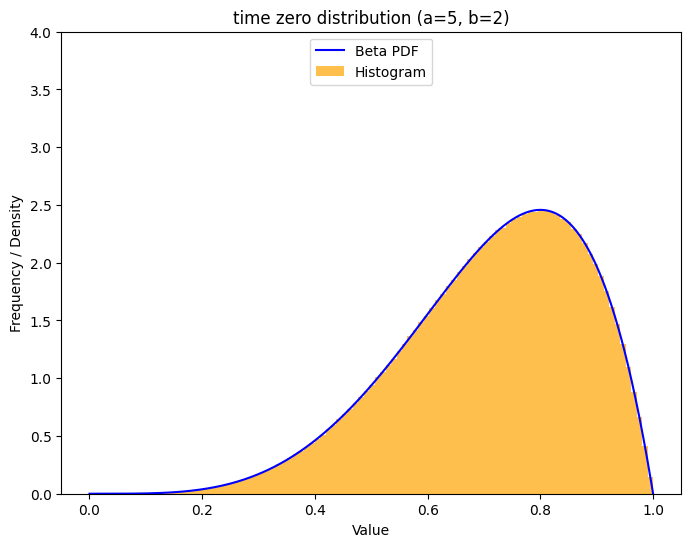

In [20]:
# Define a named tuple for the beta distribution parameters
BetaParams = namedtuple('BetaParams', ['a', 'b'])

# Based on the named tuple for the beta distribution parameters we defined
# Create an instance of BetaParams for each initial density:
initial_densities = [BetaParams(a=2, b=2), BetaParams(a=2, b=5), BetaParams(a=5, b=2)]

# Number of observations and time period
n = 100000
T = 50

# Function to plot beta distribution and histogram

def plot_beta_distribution_and_histogram(params, n, T):
    # Generate n draws from the beta distribution
    beta_samples = np.random.beta(params.a, params.b, size=(n, T))

    # Calculate the beta distribution density function
    x = np.linspace(0, 1, 1000)
    beta_pdf = beta.pdf(x, params.a, params.b)

    # Plot the density function and histogram together
    plt.figure(figsize=(8, 6))
    plt.plot(x, beta_pdf, label='Beta PDF', color='blue')
    plt.hist(beta_samples.ravel(), bins=100, density=True, alpha=0.7, label='Histogram', color='orange')

    plt.ylim(bottom=0, top=4)
    plt.legend(loc='upper center')
    plt.xlabel('Value')
    plt.ylabel('Frequency / Density')
    plt.title(f'time zero distribution (a={params.a}, b={params.b})')
    plt.grid(False)
    plt.show()

# Plot the beta distribution and histogram
for i in range(len(initial_densities)):
  plot_beta_distribution_and_histogram(initial_densities[i], n, T)


In [22]:

# Define a named tuple for the updated cross-sectional data arguments
CrossSectionalParams = namedtuple('CrossSectionalParams', ['x0', 'n', 'T'])

# # Create an instance of CrossSectionalParams
# cross_section_params = CrossSectionalParams(x0 = np.random.beta(2, 2, n), n=100000, T=50)

In [23]:
# Function to compute updated cross-sectional data

@njit
def updated_cross_section(params):
    x0 = params.x0
    n = params.n
    T = params.T
    xT = np.zeros(n)

    for i in range(len(x0)):
        # Create a config object with the initial value and T
        config = ConfigSettings(initial_x=x0[i], T=T)
        # Compute x_T following the law of motion for each initial value
        xT[i] = time_series(config)[-1]

    return xT


In [24]:
# Function to plot histogram and density
def plot_histogram_and_density(params):
    # Compute updated cross-sectional data
    xT = updated_cross_section(params)

    # Calculate the density of psi_star for the entire range of x
    x = np.linspace(0, 1, 1000)
    psi_star = 1 / (np.pi * np.sqrt(x * (1 - x)))

    # Plot the histogram and density together
    plt.figure(figsize=(8, 6))
    plt.hist(xT, bins=100, density=True, alpha=0.7, label='Histogram', color='blue')
    plt.plot(x, psi_star, label='$\psi^*$', color='orange')

    # Set the y-axis limits
    plt.ylim(bottom=0, top=6)

    plt.legend(loc='upper center')
    plt.xlabel('Value')
    plt.ylabel('Frequency / Density')
    plt.title('Time t distribution')
    plt.grid(False)
    plt.show()

/var/folders/lp/vd5yxyh52dl94r3hlcnk9z8w0000gn/T/ipykernel_89013/442807977.py:8: RuntimeWarning: divide by zero encountered in divide
  psi_star = 1 / (np.pi * np.sqrt(x * (1 - x)))


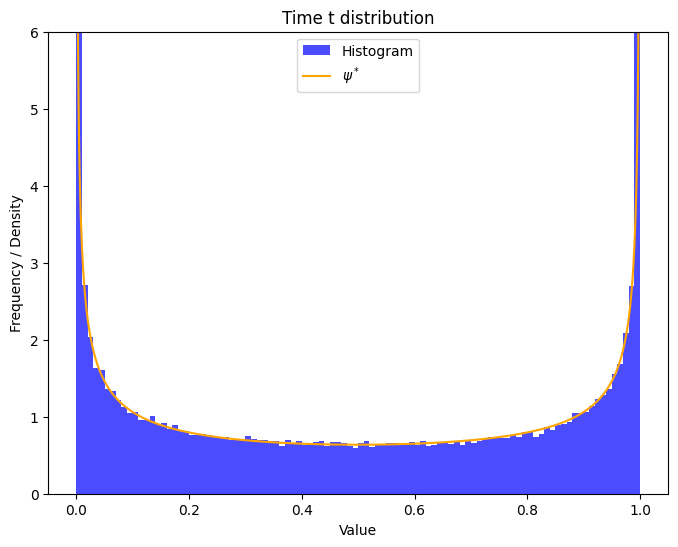

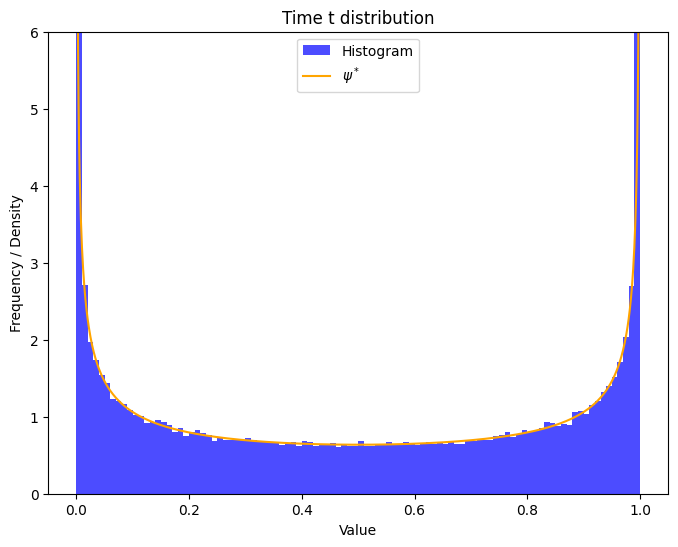

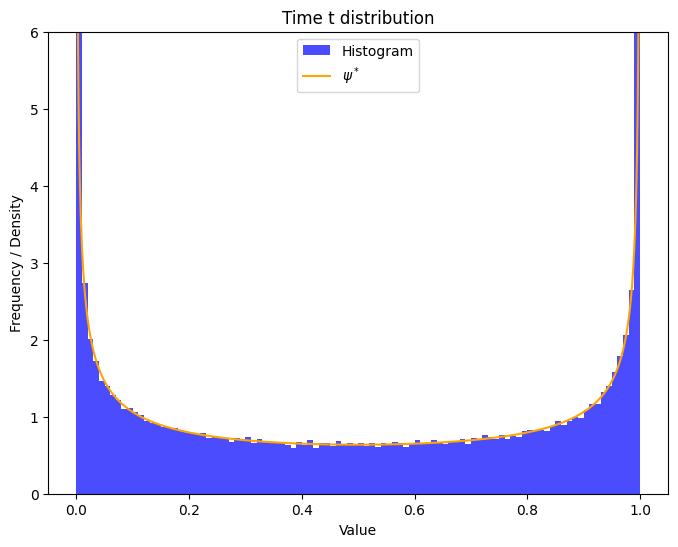

In [25]:
# Plot histogram and density for updated cross-sectional data

# Define a list to store instances of CrossSectionalParams
cross_section_params_list = []

# Create instances of CrossSectionalParams for each initial density
for params in initial_densities:
    x0 = np.random.beta(params.a, params.b, n)
    cross_section_params = CrossSectionalParams(x0=x0, n=n, T=T)
    cross_section_params_list.append(cross_section_params)

# Now cross_section_params_list contains instances for each initial density
for i in range(len(cross_section_params_list)):
    plot_histogram_and_density(cross_section_params_list[i])

## Exercise 2

In [28]:
# Function to compute updated cross-sectional data
@njit(parallel=True)
def updated_cross_section_ex2(params):
    x0 = params.x0
    n = params.n
    T = params.T
    xT = np.zeros(n)

    for i in prange(len(x0)):
        # Create a config object with the initial value and T
        config = ConfigSettings(initial_x=x0[i], T=T)
        # Compute x_T following the law of motion for each initial value
        xT[i] = time_series(config)[-1]

    return xT


In [29]:
cross_section_params_ex2 = CrossSectionalParams(x0 = np.random.uniform(0, 1, 10000000), n = 10000000, T = 100)


%timeit updated_cross_section_ex2(cross_section_params_ex2)


981 ms ± 129 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:


# import jax
# import jax.numpy as jnp